In [1]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

import matplotlib.pyplot as plt
import os
import sys
sys.path.append(os.path.abspath('..'))

plt.rcParams.update({'font.size': 12})
from laho.tune import Tuner
import pandas as pd
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter

np.random.seed(4)

In [2]:
N = 60

params_config = {
    "x1":{
        "min":0.0,
        "max":1.0
    },
    "x2":{
        "min":0.0,
        "max":1.0
    }
}

objectives_config = {
    "f":{
        "target":1.0,
        "limit":0.0,
        "priority":1.0
    }
}

In [3]:
#k1 = 2
#k2 = 2

#def func(x1,x2):
#    return 0.5*(2*(x1 + x2) + np.sin(2*np.pi*k1*x1) + np.sin(2*np.pi*k2*x2))
# a = 1
# b = 5
# def func(x1,x2):
#     return -((a-x1)**2+b*(x2-x1**2)**2)

# a = 1.5
# def func(x1,x2):
#     return np.exp(-(x1*x2-a)**2-(x2-a)**2)

a1 = 1.25
a2 = 4
mu = np.array([0.3,0.25])
sig = 1.0
def func(x1,x2):
    z = np.array([x1**a1,x2**a2])
    s = z-mu
    return np.exp(-(s.T.dot(s)/(0.015*x1*x2)))

In [4]:
x1 = np.linspace(0,1,N)
x2 = np.linspace(0,1,N)

f = np.zeros((N,N))

for i,x in enumerate(x1):
    for j,y in enumerate(x2):
        f[i,j] = func(x,y)

/Users/gmaher/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars


/Users/gmaher/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


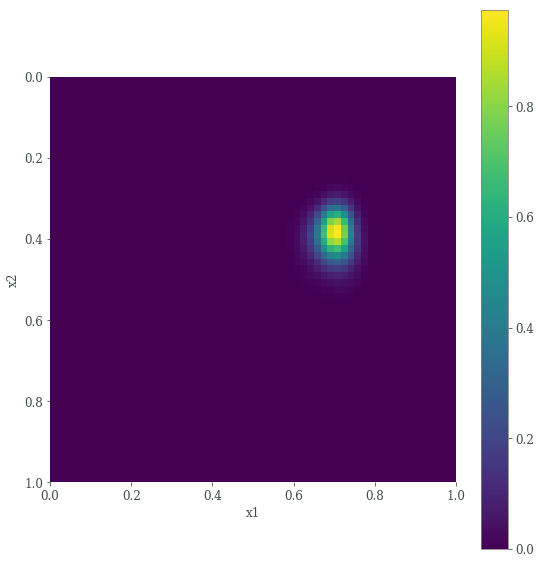

In [5]:
plt.figure(figsize=(8,8))
plt.imshow(f, extent=[0,1,1,0])
plt.xlabel('x1')
plt.ylabel('x2')
#plt.title('Portfolio IR')
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
def run(x1, x2):
    
    f = func(x1,x2) 
    
    return {"f":f}

In [7]:
N_MC = 100
N_min = 20
N_runs = 200

In [8]:
dfs = []
for i in range(N_MC):
    np.random.seed(i)
    tuner = Tuner(params_config, objectives_config, min_samples=N_min)
    results = tuner.tune(run, num_runs=N_runs, n_jobs=1)
    leaderboard = tuner.get_leaderboard()
    leaderboard = leaderboard.sort_values('run')
    leaderboard['best_f'] = leaderboard.expanding().max()['f']
    leaderboard['seed'] = i
    dfs.append(leaderboard)
    
laho_df = pd.concat(dfs)

Running hyperparameter tuning with 1 cpus
Running hyperparameter tuning with 1 cpus
Running hyperparameter tuning with 1 cpus
Running hyperparameter tuning with 1 cpus
Running hyperparameter tuning with 1 cpus
Running hyperparameter tuning with 1 cpus
Running hyperparameter tuning with 1 cpus
Running hyperparameter tuning with 1 cpus
Running hyperparameter tuning with 1 cpus
Running hyperparameter tuning with 1 cpus
Running hyperparameter tuning with 1 cpus
Running hyperparameter tuning with 1 cpus
Running hyperparameter tuning with 1 cpus
Running hyperparameter tuning with 1 cpus
Running hyperparameter tuning with 1 cpus
Running hyperparameter tuning with 1 cpus
Running hyperparameter tuning with 1 cpus
Running hyperparameter tuning with 1 cpus
Running hyperparameter tuning with 1 cpus
Running hyperparameter tuning with 1 cpus
Running hyperparameter tuning with 1 cpus
Running hyperparameter tuning with 1 cpus
Running hyperparameter tuning with 1 cpus
Running hyperparameter tuning with

In [9]:
dfs = []
for i in range(N_MC):
    np.random.seed(i)
    tuner_uniform = Tuner(params_config, objectives_config, min_samples=1000)
    tuner_uniform.tune(run, num_runs=200, n_jobs=1)
    ldr_uniform = tuner_uniform.get_leaderboard()
    ldr_uniform = ldr_uniform.sort_values('run')
    ldr_uniform['best_f'] = ldr_uniform.expanding().max()['f']
    ldr_uniform['seed'] = i
    dfs.append(ldr_uniform)
    
uni_df = pd.concat(dfs)

Running hyperparameter tuning with 1 cpus
Running hyperparameter tuning with 1 cpus
Running hyperparameter tuning with 1 cpus
Running hyperparameter tuning with 1 cpus
Running hyperparameter tuning with 1 cpus
Running hyperparameter tuning with 1 cpus
Running hyperparameter tuning with 1 cpus
Running hyperparameter tuning with 1 cpus
Running hyperparameter tuning with 1 cpus
Running hyperparameter tuning with 1 cpus
Running hyperparameter tuning with 1 cpus
Running hyperparameter tuning with 1 cpus
Running hyperparameter tuning with 1 cpus
Running hyperparameter tuning with 1 cpus
Running hyperparameter tuning with 1 cpus
Running hyperparameter tuning with 1 cpus
Running hyperparameter tuning with 1 cpus
Running hyperparameter tuning with 1 cpus
Running hyperparameter tuning with 1 cpus
Running hyperparameter tuning with 1 cpus
Running hyperparameter tuning with 1 cpus
Running hyperparameter tuning with 1 cpus
Running hyperparameter tuning with 1 cpus
Running hyperparameter tuning with

In [10]:
laho_m = laho_df.groupby('run').mean().reset_index().sort_values('run')
laho_s = laho_df.groupby('run').std().reset_index().sort_values('run')

uni_m = uni_df.groupby('run').mean().reset_index().sort_values('run')
uni_s = uni_df.groupby('run').std().reset_index().sort_values('run')

In [11]:
laho_m

,run,x1,x2,f,score,best_f,seed
0,0,0.472420,0.500968,0.000489,0.999511,0.000489,49.5
1,1,0.476656,0.494587,0.009936,0.990064,0.010425,49.5
2,2,0.476819,0.501746,0.007512,0.992488,0.017898,49.5
3,3,0.476906,0.517601,0.019939,0.980061,0.037706,49.5
4,4,0.485188,0.515110,0.004873,0.995127,0.042447,49.5
...,...,...,...,...,...,...,...
195,195,0.422792,0.685314,0.489159,0.510841,0.922746,49.5
196,196,0.379997,0.660715,0.423283,0.576717,0.922746,49.5
197,197,0.398041,0.701754,0.506090,0.493910,0.923148,49.5
198,198,0.401561,0.677666,0.469202,0.530798,0.923246,49.5


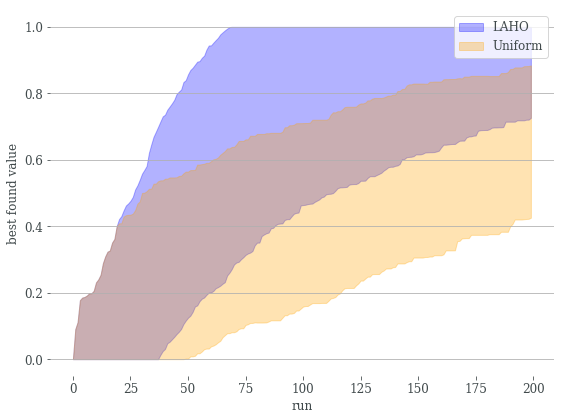

In [18]:
plt.figure(figsize=(8,6))

ub = laho_m['best_f']+laho_s['best_f']
ub = ub.clip(0,1)

lb = laho_m['best_f']-laho_s['best_f']
lb = lb.clip(0,1)

plt.fill_between(laho_m['run'],ub,lb, facecolor='blue', color='b', alpha=0.3, label='LAHO')


ub = uni_m['best_f']+uni_s['best_f']
ub = ub.clip(0,1)

lb = uni_m['best_f']-uni_s['best_f']
lb = lb.clip(0,1)

plt.fill_between(uni_m['run'],ub,lb, facecolor='orange', color='orange',
                 alpha=0.3, label='Uniform')

# plt.plot(laho_m['run'],laho_m['best_f']-laho_s['best_f'], label='laho', color='b')
# plt.plot(laho_m['run'],laho_m['best_f']+laho_s['best_f'], color='b')
# plt.plot(uni_m['run'],uni_m['best_f']-uni_s['best_f'], label='uniform', color='orange')
# plt.plot(uni_m['run'],uni_m['best_f']+uni_s['best_f'], color='orange')
plt.xlabel('run')
plt.ylabel('best found value')
plt.legend()
plt.show()